# Example

Running a simulation involves three steps.

1. Create a `PopulationDistribution` with the desired population characteristics.
2. Create a list of `TestingStrategy` instances.
3. Create a `Simulator` and call `run()`.

Let's look at an example.

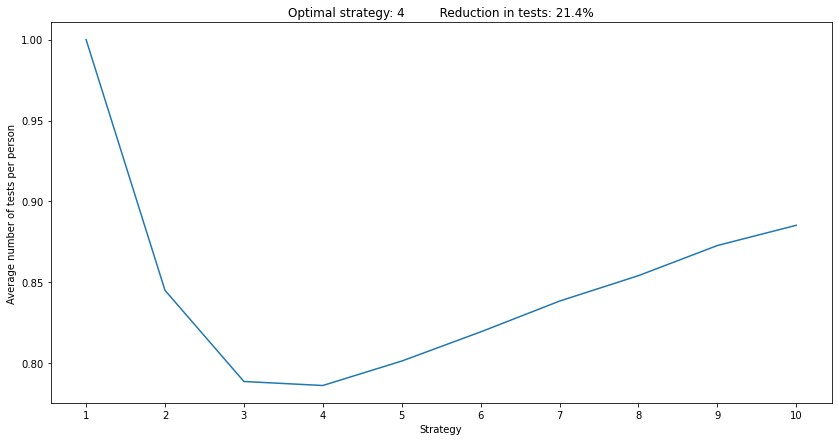

In [5]:
import pooledtesting as pt


population_distribution = pt.PopulationDistribution(prevalence = 0.2,
                                                    population = 100,
                                                    correlation = 0.1,
                                                    num_samples = 10000)
test = pt.Test(sensitivity = 1, specificity = 1)
strategies = [pt.TwoStageTesting(test = test, pool_size = pool_size)
              for pool_size
              in range(1, 11)]
simulator = pt.Simulator(population_distribution = population_distribution,
                         strategies = strategies)
simulator.run()
simulator.plot();

### PopulationDistribution

We start off by creating a `PopulationDistribution` where each person in the population has a 20% chance of being infected and where the infection status of each pair of people has a correlation of 0.1. We create 10000 samples with each sample containing the infection statuses of the 100 people in the population. We can see the result (which in this case is a 10000 by 100 array of 1s and 0s) by accessing the `samples` property.

In [3]:
population_distribution.samples

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In order to create a `PopulationDistribution`, we must specify the infection probabilities of each person in the population. This can be done by providing an argument for `probabilities` or by providing arguments for both `prevalence` and `population`. If we want to specify a different probability for each person, then we would provide a 1D array for `probabilities`.

For specifying the pairwise correlation of infections, we have three options: we could supply an argument for either `correlation`, `correlation_matrix` or `cluster_correlations`. `correlation` takes a number that represents the same correlation between all pairs of people. If we want to specify a different correlation for each pair of people, we would provide a 2D correlation matrix for `correlation_matrix`. If we want to specify the pairwise correlation for clusters of people, we would provide a two-column array for `cluster_correlations`, where the first column contains the pairwise correlation within each cluster and the second column contains the number of people in each cluster. If we want to specify that infections among people are uncorrelated, then we would simply not provide any of the three arguments.

A word of caution: the current implementation of simulating binary variables does not scale well. If some form of correlation is specified and the population is greater than say 1000, it could take quite a while to generate the samples.

### TestingStrategy

Now that we have created a `PopulationDistribution`, we need to create a list of `TestingStrategy` instances. Every `TestingStrategy` requires the supply of a diagnostic `Test`. A `Test` is created by providing the `sensitivity` (true positive rate) and the `specificity` (true negative rate). Each type of `TestingStrategy` will also have its own set of unique parameters. Currently, the following types of `TestingStrategy` have been implemented:

* `TwoStageTesting`
* `ThreeStageTesting`
* `TwoDimensionalArrayTesting`
* `HighRiskLowRiskTwoStageTesting`

For a detailed description of each strategy, refer to the docstrings of each class. Incidentally, it should be quite easy to implement your own testing strategies.

### Simulator

Now that we have a `PopulationDistribution` and a list of `TestingStrategy` instances, we need to create a `Simulator` that runs the testing strategies on the population samples. To start the simulation, we need to call `run()`. This will run each `TestingStrategy` in a separate thread and calculate the total tests performed over all population samples for each strategy. We can generate a graph of the average number of tests conducted per person by calling `plot()`. We can get a Pandas `Series` of the average number of tests per person by accessing the `tests_per_person` property.

In [39]:
simulator.tests_per_person

TwoStageTesting(test = Test(sensitivity = 1, specificity = 1), pool_size = 1)     1.000000
TwoStageTesting(test = Test(sensitivity = 1, specificity = 1), pool_size = 2)     0.843618
TwoStageTesting(test = Test(sensitivity = 1, specificity = 1), pool_size = 3)     0.787126
TwoStageTesting(test = Test(sensitivity = 1, specificity = 1), pool_size = 4)     0.784020
TwoStageTesting(test = Test(sensitivity = 1, specificity = 1), pool_size = 5)     0.799350
TwoStageTesting(test = Test(sensitivity = 1, specificity = 1), pool_size = 6)     0.816420
TwoStageTesting(test = Test(sensitivity = 1, specificity = 1), pool_size = 7)     0.836729
TwoStageTesting(test = Test(sensitivity = 1, specificity = 1), pool_size = 8)     0.851964
TwoStageTesting(test = Test(sensitivity = 1, specificity = 1), pool_size = 9)     0.871023
TwoStageTesting(test = Test(sensitivity = 1, specificity = 1), pool_size = 10)    0.883060
dtype: float64